![dsl_logo.png](https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/dsl_logo.png)

# Analyzing Web Archives

Welcome to the Digital Scholarship Lab Level Analyzing Web Archives workshop. The following notebook provides an investigation into the [Meme Generator dataset](https://www.loc.gov/item/2018655320/)


## How this notebook works

This webpage is a Google Colab notebook and is comprised of different *cells*. Some are code cells that run Python snippets. To works through these cells simply click on the triangle _run_ button in each cell. Click in the cell below to see the play button, then click on it.

In [1]:
!pip install langdetect

import pandas as pd
import matplotlib.pyplot as plt
#from IPython.core.display import display,HTML
from IPython.display import Image,display
from langdetect import detect
import matplotlib.pyplot as plt

%matplotlib inline
print("Libraries loaded, and ready to run!")

     |██                              | 61 kB 1.2 MB/s eta 0:00:01

     |██████▊                         | 204 kB 1.3 MB/s eta 0:00:01

     |███████████████▍                | 471 kB 1.3 MB/s eta 0:00:01

     |████████████████████████▊       | 757 kB 1.3 MB/s eta 0:00:01

     |████████████████████████████████| 981 kB 1.3 MB/s 


 \

 |

 /

 -

 done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c9fc5c7dd1abdee94ff2c5b1a9253634c6473a4f86f916a8f400af7bfc985f49
  Stored in directory: /Users/calmurgu/Library/Caches/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb


Successfully built langdetect


Libraries loaded, and ready to run!


# Loading our data set

The information from this archive is saved in a _CSV_ file. Or put in otherwords, something like a spreadsheet. In the next cell we will load this file into something call a dataframe and we'll look at the first 5 entries by looking at the **head**.

In [2]:
meme_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/memegenerator.csv", sep=",")
meme_data.head(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
0,10509464,http://webarchive.loc.gov/all/0/http://cdn.mem...,Spiderman Approves,http://memegenerator.net/instance/10509464,91eee1453f2b66b4b0d662476bf630d8,87868,seems legit,Spiderman Approves,seems,legit
1,12285257,http://webarchive.loc.gov/all/0/http://cdn.mem...,Alright Then Business Kid,http://memegenerator.net/instance/12285257,96a3aa60c0f3a5ffb027e8977f23b2cc,110242,Fret not I stayed at a Holiday Inn Express las...,Alright Then Business Kid,Fret not,I stayed at a Holiday Inn Express last night
2,20612245,http://webarchive.loc.gov/all/0/https://cdn.me...,Archer,http://memegenerator.net/instance/20612245,1b84704851704a2dc366768a2210d659,125963,"hello airplanes? yeah, this is blimps. Yeah, y...",Archer,"hello airplanes? yeah, this is blimps.","Yeah, you win."
3,20614628,http://webarchive.loc.gov/all/0/http://cdn.mem...,Futurama Fry,http://memegenerator.net/instance/20614628,448f5d4a15f5c90ce4d64c75013c8e9a,161623,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,Futurama Fry,LEGS IN COVER. TOO HOT. LEGS OUT OF COVER. TOO...,BUt Scared monster under the bed will eat me
4,24194267,http://webarchive.loc.gov/all/0/https://cdn.me...,One Does Not Simply,http://memegenerator.net/instance/24194267,37feb180a0e7660e360ed94380b39f60,92866,one does not simply put toothpaste back in th...,One Does Not Simply,one does not simply,put toothpaste back in the tube


# Some General Data Exploration




---



### How much data?

We can count the **length** of our data frame to see how many entries we have using thing len() function.


In [3]:

print("We have this many memes to look at: ",len(meme_data))


We have this many memes to look at:  57687


### Random Entry

To get a better sense of what is in our dataset let's look at a random entry by using **sample** with a value of 1. Click the below button a few times to get a few different options.

In [4]:
rando = meme_data.sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/17995050
View on Archive: 			 http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/17995050.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
26566,17995050,http://webarchive.loc.gov/all/0/http://cdn.mem...,Socially Terrifying Penguin,http://memegenerator.net/instance/17995050,9c92de4807263d329613e39a1aa8fdd9,39658,"у матери истерика со слезами токо троллишь, чт...",Socially Terrifying Penguin,у матери истерика со слезами,"токо троллишь, чтобы громче орала"


**Q1** Have a look at the data that is associated with a random record. In the chat box suggest some things you might want to explore with this data? Share your reponse in the chat box.

# Category of memes?

As you might know, memes come in many different flavours. Let's see if we can find out how many types there are? We'll do this by **grouping** our _Base Meme Name_ column and **counting** how many entries are in each.

In [5]:
meme_data.groupby(["Base Meme Name"]).count()

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
-,70,70,70,70,70,70,70,70,70
10guy,1,1,1,1,1,1,1,1,1
12 oz mouse,9,9,9,9,9,9,9,9,9
158,66,66,66,66,66,66,66,66,66
1889 [10] guy,52,52,52,52,52,52,52,52,52
...,...,...,...,...,...,...,...,...,...
ТИПИЧНАЯ DIVA,45,45,45,45,45,45,45,45,45
ТИПИЧНЫЙ JONGHYUN,1,1,1,1,1,1,1,1,1
ТИПИЧНЫЙ ONEW,1,1,1,1,1,1,1,1,1


**Q2** Based on the above summary how many different type so memes we have? Share your response in the chat box.

Yikes! That looks like a lot. Let's just keep the top **25** entries. We'll do this by **sorting**.

In [6]:
meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)[0:25]

,Meme ID,Archived URL,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
Base Meme Name,,,,,,,,,
Y U No,766,766,766,766,766,766,766,766,766
Futurama Fry,663,663,663,663,663,663,663,663,663
Insanity Wolf,612,612,612,612,612,612,612,612,612
Philosoraptor,531,531,531,531,531,531,531,531,531
The Most Interesting Man In The World,511,511,511,511,511,511,511,511,511
Success Kid,510,510,510,510,510,510,510,510,510
Foul Bachelor Frog,469,469,469,469,469,469,469,469,468
Socially Awkward Penguin,446,446,446,446,446,446,446,446,446
Advice Yoda Gives,420,420,420,420,420,420,420,420,420


In [7]:
#@title Random Meme by Category
#@markdown Type copy and pasting one of the **Base Meme Name** to see a random entry from that category of meme
meme_option = "Slowpoke" #@param {type:"string"}

rando = meme_data[meme_data["Base Meme Name"] == str(meme_option)].sample(1)
display(Image(url=rando['Archived URL'].values[0], format='jpg'))
print("View on Memegenerator: \t",rando['Meme Page URL'].values[0])
print("View on Archive: \t\t\t",rando['Archived URL'].values[0])
rando

View on Memegenerator: 	 http://memegenerator.net/instance/20150800
View on Archive: 			 http://webarchive.loc.gov/all/0/http://cdn.meme.am/instances/250x250/20150800.jpg


,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
29959,20150800,http://webarchive.loc.gov/all/0/http://cdn.mem...,Slowpoke,http://memegenerator.net/instance/20150800,9304eefb836ebba728487b5804badd3b,50907,мама говорит это всё план тормозит,Slowpoke,мама говорит,это всё план тормозит


What's the **average** number of memes in each type?



In [8]:
meme_type_average = meme_data.groupby(["Base Meme Name"])["Meme ID"].count().mean()
print("Average number of entries per meme category: ",meme_type_average)

Average number of entries per meme category:  34.940642035130224


Let's draw a **histogram** of this distribution

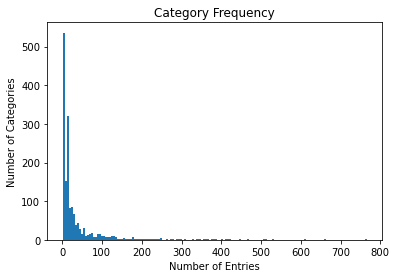

In [9]:
bins = 150

plt.hist(meme_data.groupby(["Base Meme Name"]).count().sort_values(by="Meme ID",ascending=False)["Meme ID"],bins)

plt.title("Category Frequency")
plt.xlabel("Number of Entries")
plt.ylabel("Number of Categories")
plt.show()

**Q3** Can you describe this graph? What is the biggest value that it is showing?

data things to do
- alt text somehow?
- language detection?
- pull in scores via API?

## Language info

As we've seen in our examples there are many different languages represented in our dataset. Let's see if we can **enrich** our dataset by automatically detecting what language it is and adding that as a new column. We'll us the [langdetect](https://pypi.org/project/langdetect/) library to do this. 

In [10]:
#Let's look at our random item again
rando

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text
29959,20150800,http://webarchive.loc.gov/all/0/http://cdn.mem...,Slowpoke,http://memegenerator.net/instance/20150800,9304eefb836ebba728487b5804badd3b,50907,мама говорит это всё план тормозит,Slowpoke,мама говорит,это всё план тормозит


In [11]:
# Let's the language of the random entry from earlier
# We'll get a two letter languge code that represents one of the languages in the list of ISO 639-1 codes (https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes). 
detect(str(rando["Alternate Text"]))

'ru'

It would take to long to calculate all these values now for all of the entries in the dataset. So the next cell will just add a new column to our dataset of pre-calculated values.


(It took 8 minutes for the code to run)

In [12]:
#open CSV to dataframe
lang_data = pd.read_csv("https://raw.githubusercontent.com/BrockDSL/Analyzing_Web_Archives/main/language_data.csv")
#append to meme_data dataframe
meme_data = meme_data.join(lang_data)
meme_data.sample(5)

,Meme ID,Archived URL,Base Meme Name,Meme Page URL,MD5 Hash,File Size (In Bytes),Alternate Text,Display Name,Upper Text,Lower Text,Language
4742,10484586,http://webarchive.loc.gov/all/0/https://cdn.me...,Musically Oblivious 8th Grader,http://memegenerator.net/instance/10484586,9d849825ad8cdc0be7d1a9630b570589,46180,"я люблю классический рок например, fall out boy",Musically Oblivious 8th Grader,я люблю классический рок,"например, fall out boy",ru
9991,11122907,http://webarchive.loc.gov/all/0/https://cdn.me...,Bear Grylls,http://memegenerator.net/instance/11122907,612f506c9bd67ecc8ede16867bfd8b39,78238,I should cut off my fingers and eat them I can...,Bear Grylls,I should cut off my fingers and eat them,I can just replace them with these sausages th...,en
57035,34640844,http://webarchive.loc.gov/all/0/https://cdn.me...,Advice Edit Button,http://memegenerator.net/instance/34640844,fe90beb8e806ccfc2d95782cad72367e,24526,I for one welcome overused meme thing,Advice Edit Button,I for one welcome,overused meme-thing,en
35417,22826540,http://webarchive.loc.gov/all/0/http://cdn.mem...,Feminist Cunt,http://memegenerator.net/instance/22826540,91b0bdb7ac1fd4747fa26d03caa753fa,46525,A real gentleman holds the door open for a gir...,Feminist Cunt,A real gentleman holds the door open for a girl,the only reason a guy holds the door open for ...,en
35936,23017599,http://webarchive.loc.gov/all/0/http://cdn.mem...,Extremely Drunk Metalhead,http://memegenerator.net/instance/23017599,79ecfcc27c27c29de26d6f3f2c6012e1,64977,wanted to play ME3 on release date ordered fro...,Extremely Drunk Metalhead,wanted to play ME3 on release date,ordered from zavvi,en


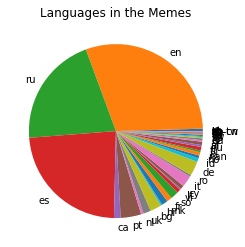

In [13]:
language_count = dict()

# Go through each row of the data and see what two letter language code
# is in the iso_language_code metadata field

for row in meme_data.itertuples(index=False):
  language_entry = row[-1]
  #Create a lookup 'dictionary' of codes
  if language_entry in language_count:
    language_count[language_entry] += 1
  else:
    language_count[language_entry] = 1
    

plt.pie(list(language_count.values()),labels=list(language_count.keys()))
plt.title("Languages in the Memes")
plt.show()